In [4]:
import pandas as pd

# Ruta al archivo Excel
file_path = 'CHC_base_anonimizada09-09-2021.xlsx'

# Cargar la hoja de datos
data = pd.read_excel(file_path, sheet_name='Datos')

# Cargar la hoja de metadatos
metadata = pd.read_excel(file_path, sheet_name='Metadatos')

# Limpiar y preparar los metadatos
# Llenar los valores NaN hacia adelante en las columnas necesarias para que cada valor tenga su variable correspondiente
metadata['variable'].fillna(method='ffill', inplace=True)
metadata['pregunta'].fillna(method='ffill', inplace=True)
metadata['id'].fillna(method='ffill', inplace=True)
metadata['tipo_dato'].fillna(method='ffill', inplace=True)

C:\Users\carlo\AppData\Local\Temp\ipykernel_27448\2157263986.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  metadata['variable'].fillna(method='ffill', inplace=True)
C:\Users\carlo\AppData\Local\Temp\ipykernel_27448\2157263986.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  metadata['pregunta'].fillna(method='ffill', inplace=True)
C:\Users\carlo\AppData\Local\Temp\ipykernel_27448\2157263986.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  metadata['id'].fillna(method='ffill', inplace=True)
C:\Users\carlo\AppData\Local\Temp\ipykernel_27448\2157263986.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  metadata['tipo_dato'

In [5]:
data.head()

,DIRECTORIO,TIP_FOR,P1,P1S1,P2,P2S1,P5,CTL_1,P8R,P9,...,P35,P36R,P37S1,P37S2,P37S3,P37S4,P37S5,P37S6,P37S7,COMPLETA
0,1,2,85,85001,1,5.0,2,1,44.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2,2,85,85001,1,5.0,2,1,33.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,2,85,85001,1,5.0,2,1,41.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4,2,85,85001,1,5.0,2,1,29.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,5,2,85,85001,1,5.0,2,1,30.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


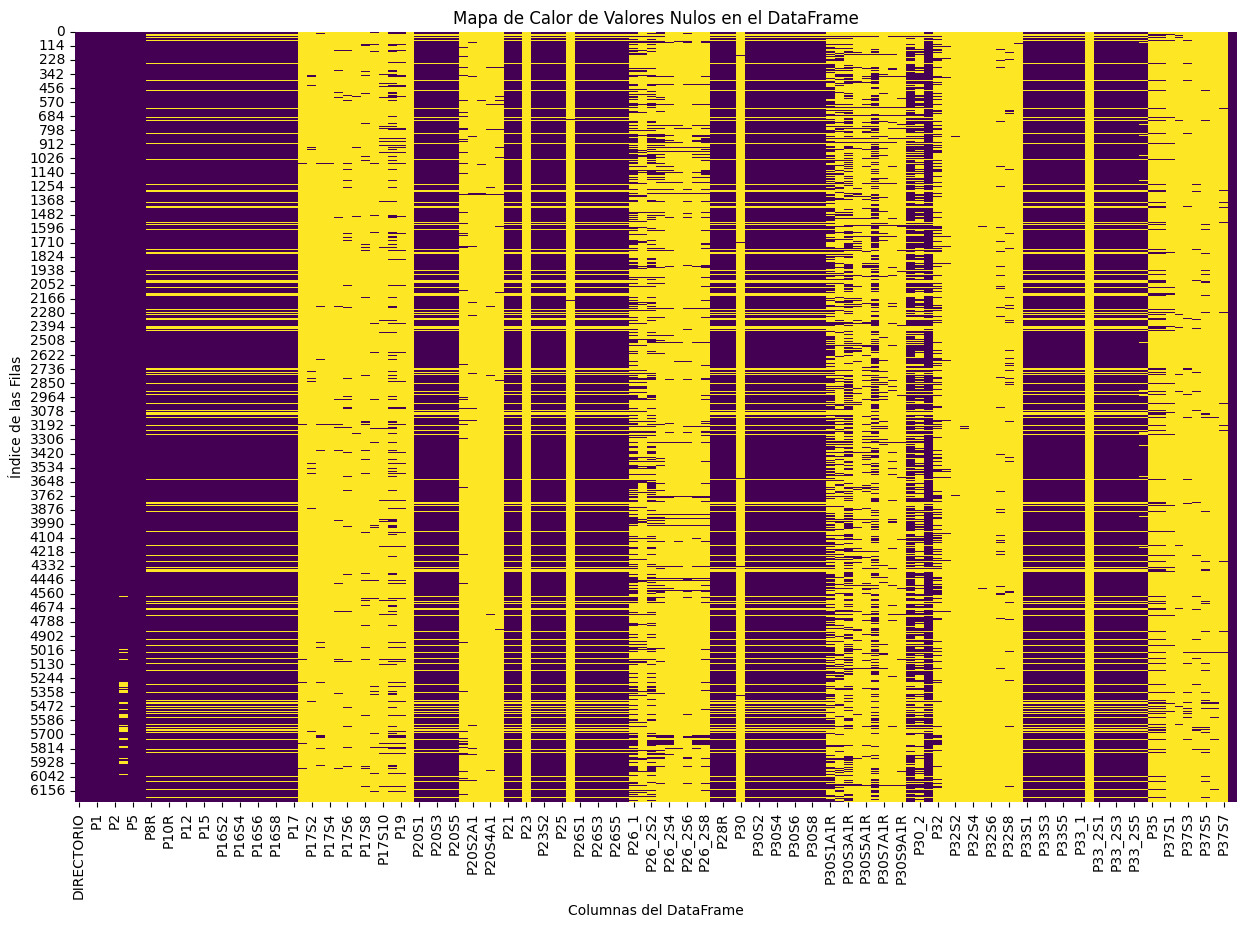

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame donde True indica que el valor es nulo
missing_data = data.isnull()

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Crear un mapa de calor. Los valores True (nulos) se mostrarán con un color diferente
sns.heatmap(missing_data, cbar=False, cmap='viridis')

# Opciones de visualización para mejorar la legibilidad
plt.title('Mapa de Calor de Valores Nulos en el DataFrame')
plt.xlabel('Columnas del DataFrame')
plt.ylabel('Índice de las Filas')

# Mostrar el gráfico
plt.show()

In [7]:
import numpy as np

# Calcular el porcentaje de nulos por columna
null_percent_cols = data.isnull().mean() * 100

# Calcular el porcentaje de nulos por fila
null_percent_rows = data.isnull().mean(axis=1) * 100

# Mostrar el porcentaje de nulos por columna
print("Porcentaje de Nulos por Columna:")
print(null_percent_cols.sort_values(ascending=False))

# Mostrar el porcentaje de nulos por fila
print("\nPorcentaje de Nulos por Fila:")
print(null_percent_rows.describe())

# Opcional: filtrar y mostrar filas con un alto porcentaje de nulos
threshold_row = 50  # Por ejemplo, el 50% de nulos
high_null_rows = null_percent_rows[null_percent_rows > threshold_row]
print("\nFilas con más del 50% de nulos:")
print(high_null_rows)

# Decidir sobre la eliminación de filas
rows_to_drop = high_null_rows.index
data_cleaned_rows = data.drop(index=rows_to_drop)

Porcentaje de Nulos por Columna:
P23         100.00000
P20          99.96799
P32S4        99.96799
P33          99.93598
P32S6        99.93598
              ...    
P5            0.00000
P2            0.00000
P1S1          0.00000
P1            0.00000
COMPLETA      0.00000
Length: 130, dtype: float64

Porcentaje de Nulos por Fila:
count    6248.000000
mean       49.433172
std        17.181204
min        28.461538
25%        41.538462
50%        43.076923
75%        45.384615
max        91.538462
dtype: float64

Filas con más del 50% de nulos:
9       90.769231
16      90.769231
17      90.769231
19      90.769231
20      90.769231
          ...    
6230    90.769231
6235    91.538462
6237    90.769231
6239    89.230769
6240    90.769231
Length: 908, dtype: float64


In [8]:
# Filtrar columnas
columns = [col for col in data_cleaned_rows.columns if col.startswith('P17')] # cero por contexto
columns = columns + ['P18','P26_1','P30_1','P30_2',#opciones de descarte
                     'P19','P20S1A1','P20S2A1','P20S3A1','P20S4A1','P20S5A1'# cero por contexto
                     ] 
columns = columns + [col for col in data_cleaned_rows.columns if col.startswith('P26_2S')]# cero por contexto
columns = columns + [col for col in data_cleaned_rows.columns if col.startswith('P32')]# cero por contexto

columns_edad =  ['P30S1A1R','P30S2A1R','P30S3A1R','P30S4A1R','P30S5A1R','P30S6A1R','P30S7A1R','P30S8A1R','P30S9A1R']

# Asignar 0 a los valores nulos en esas columnas
data_cleaned_rows[columns] = data_cleaned_rows[columns].fillna(0)

# Asignar -1 a los valores nulos en las columnas de edad de consumo
data_cleaned_rows[columns_edad] = data_cleaned_rows[columns_edad].fillna(-1)

# Asignar -1 a los valores nulos en la columna de orientacion sexual
data_cleaned_rows['P34'] = data_cleaned_rows['P34'].fillna(-1)


In [9]:
# Calcular la moda de la columna 'P2S1'
moda_departamento = data_cleaned_rows['P2S1'].mode()[0]

# Imputar la moda en los valores nulos de la columna 'P2S1'
data_cleaned_rows['P2S1'].fillna(moda_departamento, inplace=True)

In [10]:
columns_to_drop = ['DIRECTORIO','TIP_FOR','P20','P23','P26','P30','P33','P33_2','P35','P36R','P37S1','P37S2','P37S3','P37S4','P37S5','P37S6','P37S7','COMPLETA']

# Asegurarse de que solo se intenten eliminar columnas que existen en el DataFrame
columns_to_drop = [col for col in columns_to_drop if col in data_cleaned_rows.columns]

# Eliminar las columnas especificadas del DataFrame
data_cleaned_rows.drop(columns=columns_to_drop, inplace=True)

In [11]:
null_counts = data_cleaned_rows.isnull().sum()

# Filtrar para mostrar solo las columnas que aún tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Mostrar los resultados
print("Columnas con valores nulos y su cantidad:")
print(columns_with_nulls)

Columnas con valores nulos y su cantidad:
Series([], dtype: int64)


In [12]:
metadata.head(20)

,variable,pregunta,id,tipo_dato,valor,desc_valor,tipo_pregunta
0,DIRECTORIO,DIRECTORIO,DIRECTORIO,NUMBER (15),NaN,Identificador asignado a la encuesta en el pro...,numerica
1,TIP_FOR,Formulario aplicado en:,TIP_FOR,NUMBER (1),1.0,DMC,categorica
2,P1,1. Departamento,P1,VARCHAR2 (2 Byte),NaN,NaN,categorica
3,P1S1,1.1 Municipio o Área no municipalizada,P1S1,VARCHAR2 (5 Byte),NaN,NaN,categorica
4,P2,2. Clase,P2,NUMBER (1),1.0,1. Cabecera municipal (clase 1),categorica
5,P2S1,Localidad/Comuna,P2S1,VARCHAR2 (7 Byte),NaN,NaN,categorica
6,P5,5. Lugar de la entrevista,P5,NUMBER (1),1.0,"1. En la calle (puente, andén, parque, alcanta...",categorica
7,P5,5. Lugar de la entrevista,P5,NUMBER (1),2.0,2. En institución,categorica
8,P5,5. Lugar de la entrevista,P5,NUMBER (1),3.0,"3. En un dormitorio transitorio (hotel, paga d...",categorica
9,P5,5. Lugar de la entrevista,P5,NUMBER (1),4.0,4. En otro lugar,categorica


In [13]:
# Crear un diccionario para mapear los códigos a descripciones para cada variable
value_maps = {}
for var in metadata['variable'].unique():
    temp_df = metadata[metadata['variable'] == var]
    value_map = dict(zip(temp_df['valor'], temp_df['desc_valor']))
    value_maps[var] = value_map
value_maps

{'DIRECTORIO': {nan: 'Identificador asignado a la encuesta en el proceso de cargue'},
 'TIP_FOR': {1.0: 'DMC'},
 'P1': {nan: nan},
 'P1S1': {nan: nan},
 'P2': {1.0: '1. Cabecera municipal (clase 1)'},
 'P2S1': {nan: nan},
 'P5': {1.0: '1. En la calle (puente, andén, parque, alcantarilla, etc).\n',
  2.0: '2. En institución',
  3.0: '3. En un dormitorio transitorio (hotel, paga diario, inquilinato, residencia, camarote)',
  4.0: '4. En otro lugar'},
 'CTL_1': {1.0: '1. Con entrevista directa', 2.0: '2. Por observación'},
 'P8R': {nan: nan},
 'P9': {1.0: '1. Hombre', 2.0: '2. Mujer'},
 'P10R': {1.0: '1. Registro civil de nacimiento',
  2.0: '2. Tarjeta de identidad',
  3.0: '3. Cédula de ciudadanía',
  4.0: '4. Cédula de extranjería',
  5.0: '5. No tiene documento de identidad',
  6.0: '6. No sabe',
  7.0: '7. No responde'},
 'P11': {1.0: '1. En este municipio',
  2.0: '2. En otro municipio colombiano',
  3.0: '3. En otro país'},
 'P12': {1.0: '1. En este municipio',
  2.0: '2. En otro m

In [14]:
# Filtrar las variables binarias desde los metadatos y asegurar que solo se consideren las que existen en el DataFrame actual
binary_vars = metadata[metadata['tipo_pregunta'] == 'binaria']['variable'].drop_duplicates()
binary_vars = [var for var in binary_vars if var in data_cleaned_rows.columns]

# Ajustar los valores en el DataFrame de datos para las variables binarias
for var in binary_vars:
    # Cambiar 2 a 0; 1 ya está como 1
    data_cleaned_rows[var] = data_cleaned_rows[var].replace({2: 0})

# Opcional: Verificar los cambios en alguna de las variables binarias
print("Verificación de las variables binarias ajustadas:")
print(data_cleaned_rows[binary_vars].head())

Verificación de las variables binarias ajustadas:
   P17  P19  P20S1  P20S2  P20S3  P20S4  P20S5  P20S1A1  P20S2A1  P20S3A1  \
0  1.0  1.0    0.0    0.0    0.0    0.0    0.0      0.0      0.0      0.0   
1  1.0  1.0    0.0    0.0    0.0    0.0    0.0      0.0      0.0      0.0   
2  0.0  0.0    0.0    0.0    0.0    0.0    0.0      0.0      0.0      0.0   
3  1.0  0.0    0.0    0.0    0.0    0.0    0.0      0.0      0.0      0.0   
4  1.0  1.0    0.0    0.0    0.0    0.0    0.0      0.0      0.0      0.0   

   ...  P33S3  P33S4  P33S5  P33S6  P33_1  P33_2S1  P33_2S2  P33_2S3  P33_2S4  \
0  ...    1.0    0.0    0.0    0.0    1.0      0.0      0.0      0.0      0.0   
1  ...    0.0    0.0    0.0    0.0    1.0      0.0      0.0      0.0      0.0   
2  ...    0.0    0.0    0.0    0.0    0.0      0.0      0.0      0.0      0.0   
3  ...    1.0    1.0    1.0    0.0    0.0      0.0      0.0      0.0      0.0   
4  ...    0.0    0.0    0.0    0.0    0.0      1.0      0.0      0.0      1.0   



In [15]:
# Filtrar las variables binarias desde los metadatos y asegurar que solo se consideren las que existen en el DataFrame actual
binary_vars = metadata[metadata['tipo_pregunta'] == 'binaria']['variable'].drop_duplicates()
binary_vars = [var for var in binary_vars if var in data_cleaned_rows.columns]

# Ajustar los valores en el DataFrame de datos para las variables binarias
for var in binary_vars:
    data_cleaned_rows[var] = data_cleaned_rows[var].astype('category')
    
categorical_vars = metadata[metadata['tipo_pregunta'] == 'categorica']['variable'].drop_duplicates()
categorical_vars = [var for var in categorical_vars if var in data_cleaned_rows.columns]

# Ajustar los valores en el DataFrame de datos para las variables categoricas
for var in categorical_vars:
    data_cleaned_rows[var] = data_cleaned_rows[var].astype('category')
    
# Identificar las variables numéricas desde los metadatos
numeric_vars = metadata[metadata['tipo_pregunta'] == 'numerica']['variable'].tolist()
numeric_vars = [var for var in numeric_vars if var in data_cleaned_rows.columns]

# Ajustar los valores en el DataFrame de datos para las variables numericas
for var in categorical_vars:
    data_cleaned_rows[var] = data_cleaned_rows[var].astype('int')

In [35]:
#data_cleaned_rows.to_excel('CHC_sin_nulos.xlsx',index=False)

# **PCA**

In [16]:
import pandas as pd
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo Excel guardado
df = pd.read_excel('CHC_sin_nulos.xlsx')
#df = data_cleaned_rows

# Ruta al archivo Excel
file_path = 'CHC_base_anonimizada09-09-2021.xlsx'

# Cargar la hoja de metadatos
metadata = pd.read_excel(file_path, sheet_name='Metadatos')

# Limpiar y preparar los metadatos
# Llenar los valores NaN hacia adelante en las columnas necesarias para que cada valor tenga su variable correspondiente
metadata['variable'].fillna(method='ffill', inplace=True)
metadata['pregunta'].fillna(method='ffill', inplace=True)
metadata['id'].fillna(method='ffill', inplace=True)
metadata['tipo_dato'].fillna(method='ffill', inplace=True)

# Filtrar las variables binarias desde los metadatos y asegurar que solo se consideren las que existen en el DataFrame actual
binary_vars = metadata[metadata['tipo_pregunta'] == 'binaria']['variable'].drop_duplicates()
binary_vars = [var for var in binary_vars if var in df.columns]

# Ajustar los valores en el DataFrame de datos para las variables binarias
for var in binary_vars:
    df[var] = df[var].astype('category')
    
categorical_vars = metadata[metadata['tipo_pregunta'] == 'categorica']['variable'].drop_duplicates()
categorical_vars = [var for var in categorical_vars if var in df.columns]

# Ajustar los valores en el DataFrame de datos para las variables categoricas
for var in categorical_vars:
    df[var] = df[var].astype('category')
    
# Identificar las variables numéricas desde los metadatos
numeric_vars = metadata[metadata['tipo_pregunta'] == 'numerica']['variable'].tolist()
numeric_vars = [var for var in numeric_vars if var in df.columns]

# Ajustar los valores en el DataFrame de datos para las variables numericas
for var in categorical_vars:
    df[var] = df[var].astype('int')

C:\Users\carlo\AppData\Local\Temp\ipykernel_27448\2463044758.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  metadata['variable'].fillna(method='ffill', inplace=True)
C:\Users\carlo\AppData\Local\Temp\ipykernel_27448\2463044758.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  metadata['pregunta'].fillna(method='ffill', inplace=True)
C:\Users\carlo\AppData\Local\Temp\ipykernel_27448\2463044758.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  metadata['id'].fillna(method='ffill', inplace=True)
C:\Users\carlo\AppData\Local\Temp\ipykernel_27448\2463044758.py:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  metadata['tipo_dato'

C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


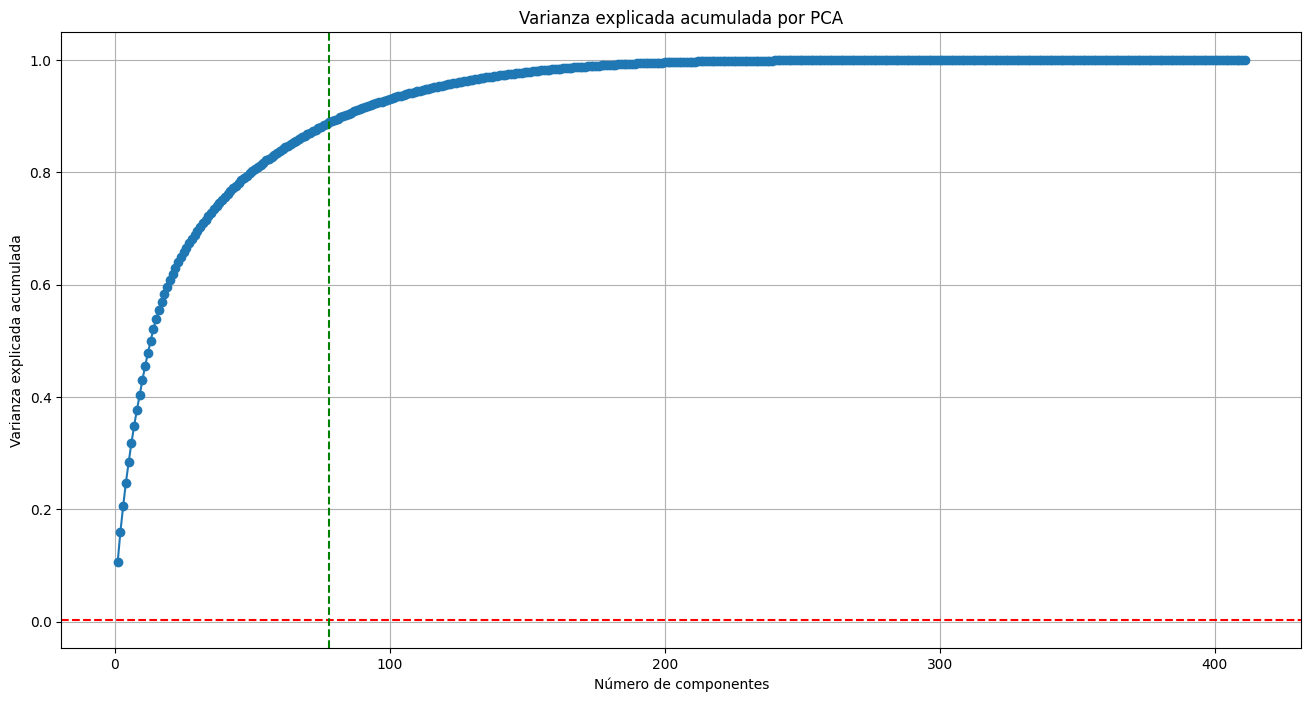

Número óptimo de componentes según Kaiser: 78


In [17]:
# Suponer columnas numéricas y categóricas
num_attribs = numeric_vars  # Ajustar según tus datos
cat_attribs = binary_vars + categorical_vars  # Ajustar según tus datos

# Crear un transformador de columnas
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_attribs),
    ('cat', OneHotEncoder(sparse=False), cat_attribs)  # Asegurar salida densa
])

# Crear un pipeline con preprocesador y PCA
pca = PCA()  # No especificar n_components para calcular todos los componentes
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', pca)])

# Ajustar el modelo
pipeline.fit(df)

# Obtener la varianza explicada y acumulada
varianza_explicada = pipeline.named_steps['pca'].explained_variance_ratio_
varianza_acumulada = varianza_explicada.cumsum()

# Método de Kaiser para determinar el n_components óptimo
valores_propios = pipeline.named_steps['pca'].explained_variance_
kaiser_criterion = valores_propios > valores_propios.mean()
n_components_kaiser = sum(kaiser_criterion)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(16, 8))
plt.plot(range(1, len(varianza_explicada) + 1), varianza_acumulada, marker='o', linestyle='-')
plt.title('Varianza explicada acumulada por PCA')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.axhline(y=1.0 / len(valores_propios), color='r', linestyle='--')  # Línea horizontal para el criterio de Kaiser
plt.axvline(x=n_components_kaiser, color='g', linestyle='--')  # Línea vertical en el punto de corte de Kaiser
plt.grid(True)
plt.show()

print("Número óptimo de componentes según Kaiser:", n_components_kaiser)

C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


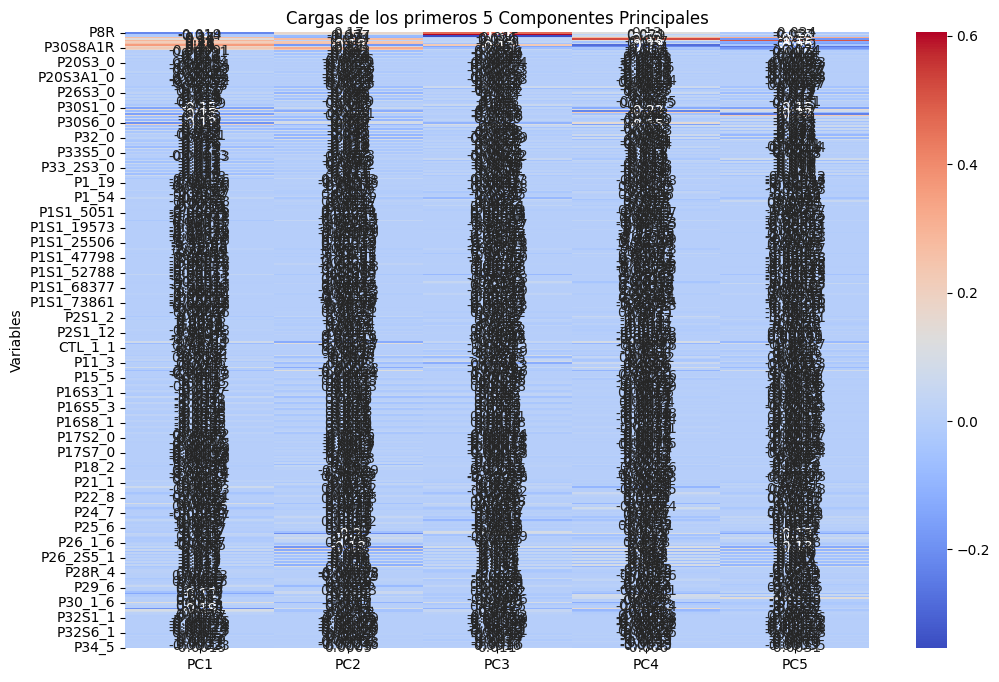

In [18]:
# Crear un pipeline con preprocesador y PCA
pca = PCA(n_components=78)  # Ajustar para calcular 78 componentes
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', pca)])

# Ajustar el modelo
pipeline.fit(df)

# Obtener las cargas de PCA
loadings = pipeline.named_steps['pca'].components_.T  # Transponer para alinear con las características originales
feature_names = preprocessor.transformers_[0][-1] + list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_attribs))

loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=feature_names)

# Visualizar las cargas para los primeros 5 componentes
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df.iloc[:, :5], cmap='coolwarm', annot=True)
plt.title('Cargas de los primeros 5 Componentes Principales')
plt.ylabel('Variables')
plt.show()

In [19]:
# Crear un pipeline con preprocesador y PCA
pca = PCA(n_components=10)  # Limitamos a los primeros 10 componentes para este análisis
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', pca)])

# Ajustar el modelo
pipeline.fit(df)

# Obtener la varianza explicada y las cargas de PCA
varianza_explicada = pipeline.named_steps['pca'].explained_variance_ratio_
varianza_acumulada = varianza_explicada.cumsum()
loadings = pipeline.named_steps['pca'].components_.T
feature_names = preprocessor.transformers_[0][-1] + list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_attribs))
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=feature_names)

# Mostrar la varianza explicada y acumulada para los primeros 10 componentes
print("Varianza Explicada por cada uno de los primeros 10 componentes:")
for i, var in enumerate(varianza_explicada, 1):
    print(f"PC{i}: {var:.4f} (Acumulada: {varianza_acumulada[i-1]:.4f})")

Varianza Explicada por cada uno de los primeros 10 componentes:
PC1: 0.1055 (Acumulada: 0.1055)
PC2: 0.0541 (Acumulada: 0.1596)
PC3: 0.0459 (Acumulada: 0.2055)
PC4: 0.0420 (Acumulada: 0.2475)
PC5: 0.0360 (Acumulada: 0.2835)
PC6: 0.0343 (Acumulada: 0.3178)
PC7: 0.0309 (Acumulada: 0.3488)
PC8: 0.0282 (Acumulada: 0.3770)
PC9: 0.0268 (Acumulada: 0.4038)
PC10: 0.0261 (Acumulada: 0.4300)


C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
top_bottom_loadings = pd.DataFrame()

for i in range(1, 11):
    top_loadings = loadings_df[f'PC{i}'].nlargest(20).reset_index()
    bottom_loadings = loadings_df[f'PC{i}'].nsmallest(20).reset_index()
    combined = pd.concat([top_loadings, bottom_loadings], axis=1)
    combined.columns = [f'PC{i}_Top_Variable', f'PC{i}_Top_Loading', f'PC{i}_Bottom_Variable', f'PC{i}_Bottom_Loading']
    top_bottom_loadings = pd.concat([top_bottom_loadings, combined], axis=1)

# Mostrar la tabla de loadings
top_bottom_loadings

,PC1_Top_Variable,PC1_Top_Loading,PC1_Bottom_Variable,PC1_Bottom_Loading,PC2_Top_Variable,PC2_Top_Loading,PC2_Bottom_Variable,PC2_Bottom_Loading,PC3_Top_Variable,PC3_Top_Loading,...,PC8_Bottom_Variable,PC8_Bottom_Loading,PC9_Top_Variable,PC9_Top_Loading,PC9_Bottom_Variable,PC9_Bottom_Loading,PC10_Top_Variable,PC10_Top_Loading,PC10_Bottom_Variable,PC10_Bottom_Loading
0,P30S6A1R,0.361356,P8R,-0.219452,P30S8A1R,0.316559,P26_1_0,-0.196772,P23S1R,0.605451,...,P30S2A1R,-0.220313,P30S4A1R,0.560704,P30S3A1R,-0.291211,P30S5A1R,0.557690,P30S4A1R,-0.262037
1,P30S3A1R,0.292191,P30S6_0,-0.190145,P30S2A1R,0.274075,P26_2S2_0,-0.182132,P8R,0.465047,...,P30S7A1R,-0.183463,P30S1A1R,0.307044,P30S7A1R,-0.288322,P23S2,0.356196,P30S9A1R,-0.244292
2,P30S1A1R,0.266586,P30_2_0,-0.190145,P30S5A1R,0.253202,P30S6A1R,-0.176399,P30S6A1R,0.224771,...,P30S5A1R,-0.112284,P30S4_1,0.152100,P30S2A1R,-0.232283,P8R,0.193440,P30S5_0,-0.171186
3,P30S5A1R,0.258384,P30S3_0,-0.153072,P30S9A1R,0.237129,P26_2S3_0,-0.128919,P30S6_1,0.100524,...,P26S1_1,-0.107809,P30S1_1,0.146852,P30S4_0,-0.152100,P30S6A1R,0.178479,P33_2S5_1,-0.138512
4,P30S8A1R,0.227070,P30S1_0,-0.147588,P30S4A1R,0.235650,P5_1,-0.128574,P25_9,0.095154,...,P30S9_0,-0.101153,P30S3_0,0.128458,P30S1_0,-0.146852,P30S5_1,0.171186,P30S7A1R,-0.132071
5,P30S4A1R,0.214138,P30_1_0,-0.132702,P26_2S2_1,0.182132,P13_1,-0.122408,P30_1_6,0.090002,...,P26_1_1,-0.099765,P17_0,0.117603,P30S3_1,-0.128458,P33_2S5_0,0.138512,P33_1_1,-0.123638
6,P30S6_1,0.190145,P30S5_0,-0.088784,P8R,0.170745,P30S2_0,-0.118570,P10R_3,0.085441,...,P30S2_1,-0.094379,P18_0,0.117603,P23S2,-0.122750,P33_1_0,0.123638,P33_2S1_1,-0.119691
7,P30S7A1R,0.187622,P33S3_0,-0.072629,P26_2S3_1,0.128919,P26_2S8_0,-0.111632,P11_2,0.083222,...,P26_2S2_1,-0.084443,P30_1_1,0.102801,P30S6A1R,-0.121644,P33_2S1_0,0.119691,P33S3_1,-0.111603
8,P30S9A1R,0.172662,P5_2,-0.070658,P5_2,0.128692,P30_1_6,-0.101844,P26_2S2_0,0.074577,...,P11_1,-0.073819,P30S5A1R,0.092805,P17_1,-0.117603,P33S3_0,0.111603,P33_2S4_1,-0.103197
9,P30S3_1,0.153072,P30S2_0,-0.070043,P13_3,0.122789,P26S3_0,-0.094787,P26_1_0,0.072017,...,P16S3_4,-0.065884,P30S2_0,0.088304,P8R,-0.106854,P33_2S4_0,0.103197,P17_1,-0.093378


## Aplicación de Clustering Jerarquico

### Paso 1: Preparar los componentes seleccionados por PCA 

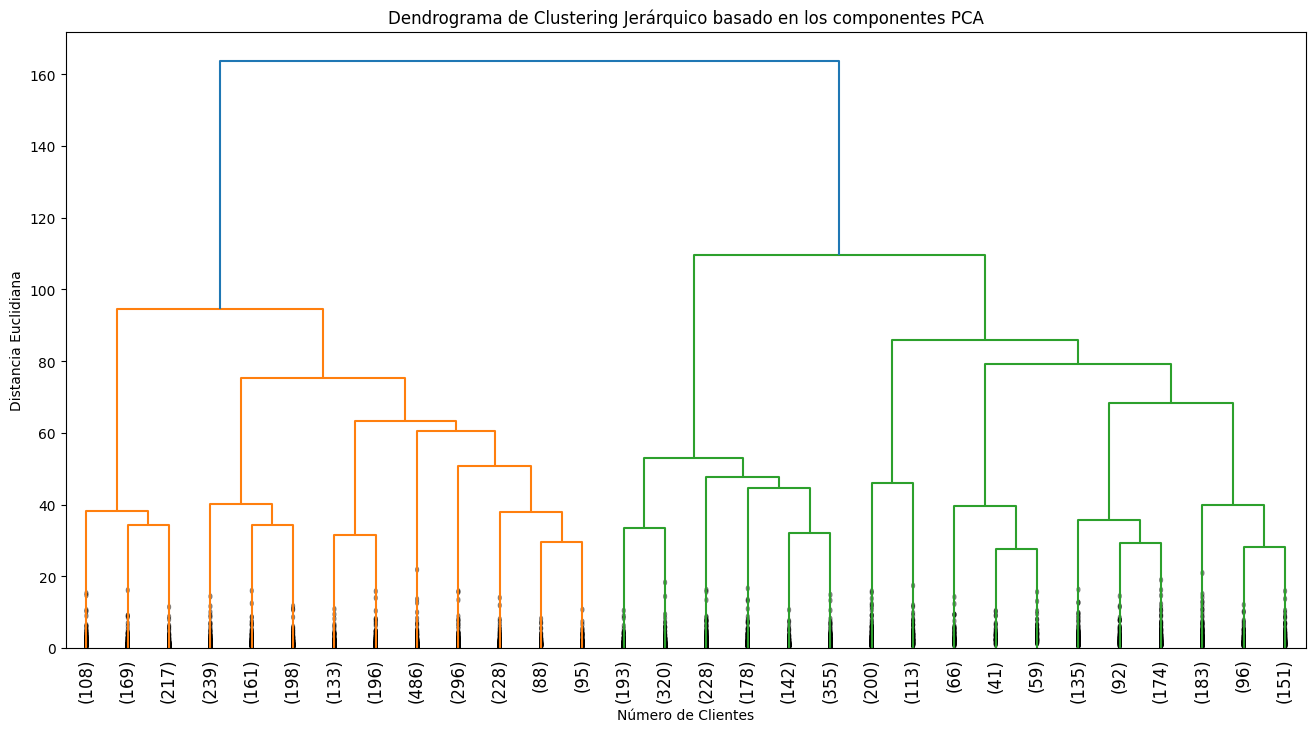

In [40]:
# Aplica la transformación completa (preprocesador + PCA) usando el pipeline
X_pca = pipeline.transform(df)  # El pipeline preprocesa y luego aplica PCA
X_pca_reducido = X_pca[:, :78]  # Tomamos solo las primeras 78 componentes

# Ahora aplica el clustering jerárquico con las 78 componentes seleccionadas
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(X_pca_reducido, method='ward', metric='euclidean')

# Graficar el dendrograma
plt.figure(figsize=(16, 8))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Dendrograma de Clustering Jerárquico basado en los componentes PCA')
plt.xlabel('Número de Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()


### Paso 2: Decidir el número óptimo de clusters

A partir del dendrograma, se observa el punto donde se podría "cortar" el árbol jerárquico para definir el número de clusters. Se podría sugerir cortar en la distancia euclidiana de 120 para obtener dos clusters grandes.

### Paso 3: Aplicar el clustering jerárquico aglomerativo con el número de clusters decidido

In [89]:
from sklearn.cluster import AgglomerativeClustering

# Aplicar clustering jerárquico aglomerativo con el número de clusters que decidas (por ejemplo: 2)
cluster_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusters = cluster_model.fit_predict(X_pca_reducido)

# Añadir los resultados de los clusters al DataFrame original para análisis
df['Cluster'] = clusters

# Visualizar la cantidad de datos en cada cluster
print(df['Cluster'].value_counts())

# Visualizar una muestra de los datos con su asignación de cluster
print(df[['Cluster']].head())


C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster
0    2726
1    2614
Name: count, dtype: int64
   Cluster
0        1
1        1
2        1
3        1
4        1


### Paso 4: Visualización de los clusters

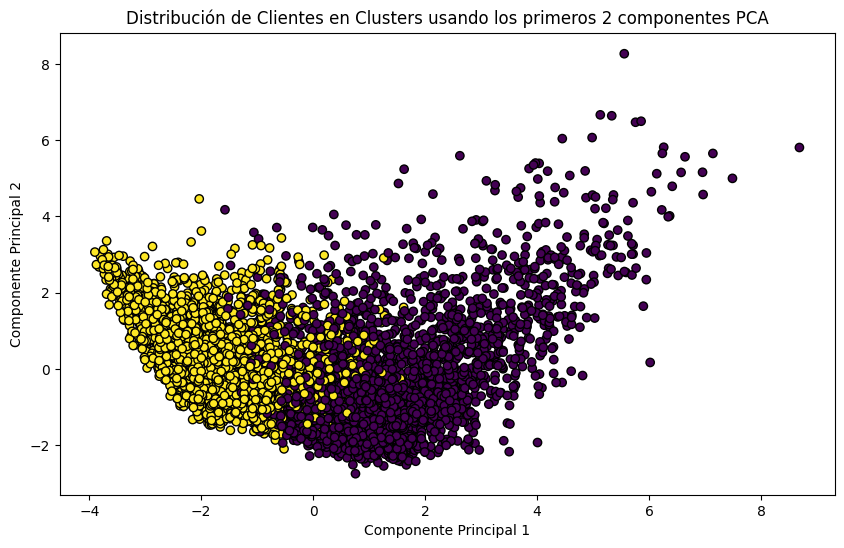

In [90]:
import matplotlib.pyplot as plt

# Visualización de los clusters utilizando los primeros dos componentes
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_reducido[:, 0], X_pca_reducido[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('Distribución de Clientes en Clusters usando los primeros 2 componentes PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


Se visualizo los resultados del clustering utilizando los dos primeros componentes principales, lo cual es útil para explorar cómo se distribuyen los puntos en el espacio reducido de PCA.

Asimismo, se encontro que los clusters están bien diferenciados en estos dos primeros componentes.

### Paso 5: Estadisticas obtenidas

In [43]:
# Seleccionar solo las columnas numéricas del DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Agrupar los datos por cluster y obtener estadísticas descriptivas solo para las columnas numéricas
cluster_summary = df.groupby('Cluster')[numeric_columns].mean()

# Mostrar el resumen por cluster
print(cluster_summary)


               P8R     P23S1R     P23S2   P30S1A1R  P30S2A1R   P30S3A1R  \
Cluster                                                                   
0        46.009564  10.469013  1.160291   6.204667  3.271614   4.496557   
1        34.649618  10.544275  0.795420  11.832824  6.535878  11.687786   
2        38.778249  11.916667  1.006356  10.293079  2.562147   8.453390   

         P30S4A1R  P30S5A1R   P30S6A1R  P30S7A1R  P30S8A1R  P30S9A1R  Cluster  
Cluster                                                                        
0       -1.000000 -0.958301  -0.779648 -0.993879 -0.910482 -0.986993      0.0  
1        6.010687  8.867939  13.846565  4.658779  4.503053  1.951145      1.0  
2       -0.977401 -0.927260  20.105932 -0.987994 -1.000000 -1.000000      2.0  


Se genero el calculo de estadisticas descriptivas por cluster, lo cual es útil para interpretar las diferencias entre los grupos.

1. Edad (P8R): 

El Cluster 1 agrupa a personas de mayor edad, posiblemente con más tiempo en situación de calle o una mayor acumulación de factores de riesgo a lo largo de los años. El Cluster 0 podría agrupar a personas más jóvenes.

2. Tiempo viviendo en la calle (P23S1R y P23S2):

Aunque el Cluster 0 tiene una ligera tendencia a haber estado más tiempo en la calle en promedio, no parece ser una diferencia notable. La variable del tiempo en la calle no parece ser el principal diferenciador entre estos clusters.

2. Consumo de sustancias (P30S1A1R, P30S2A1R):

Cluster 0 muestra valores consistentemente mayores en las variables relacionadas con el consumo de cigarrillos (P30S1A1R), alcohol (P30S2A1R), marihuana (P30S3A1R), inhalantes (P30S4A1R), cocaína (P30S5A1R), y otras sustancias.

Cluster 1, en cambio, tiene valores mucho más bajos, incluso negativos en varias de estas variables.

El Cluster 0 parece estar compuesto por personas que tienen un mayor historial de consumo de diversas sustancias, mientras que el Cluster 1 tiene un consumo notablemente menor. Esto podría indicar que el Cluster 1 agrupa a personas que han tenido menos exposición o dependencia a las drogas, o que han reducido su consumo a lo largo del tiempo.

3. Consumo de inhalantes (P30S4A1R) y cocaína (P30S5A1R):

Cluster 0: Mayor promedio en el consumo de inhalantes (2.38) y cocaína (3.77).

Cluster 1: Valores negativos en ambas categorías, lo que podría representar ausencia de consumo en estos individuos.

Estos datos refuerzan la idea de que el Cluster 0 agrupa a personas con mayor consumo de sustancias, especialmente inhalantes y cocaína, lo que puede estar asociado a un mayor grado de vulnerabilidad.

4. Uso de heroína (P30S6A1R) y otras sustancias peligrosas (P30S7A1R, P30S8A1R, P30S9A1R):

Cluster 0: Valores muy altos para P30S6A1R (heroína: 17.09), lo que indica un uso elevado.
Cluster 1: Valores extremadamente bajos o negativos, lo que sugiere que este cluster no tiene un historial significativo de consumo de estas sustancias.

El uso de sustancias como la heroína es un diferenciador clave. El Cluster 0 parece agrupar a personas con un perfil de consumo más severo, lo que puede implicar una mayor necesidad de intervenciones de salud.

* Resumen de hallazgos clave:

Cluster 0 agrupa principalmente a personas más jóvenes (36.79 años) que han pasado un poco más de tiempo en la calle y tienen un consumo notablemente más alto de múltiples sustancias, incluidas las más peligrosas como inhalantes, cocaína y heroína.

Cluster 1 agrupa a personas mayores (46.01 años), con menor historial de consumo de sustancias. Este grupo podría representar a individuos que, aunque llevan un tiempo similar viviendo en la calle, han tenido menos exposición al consumo problemático o han podido reducirlo.


* Conclusiones y posibles acciones:

Cluster 0 parece tener un perfil de mayor riesgo debido al consumo elevado de sustancias, especialmente drogas duras como la heroína. Este grupo podría beneficiarse más de programas de reducción de daños y tratamiento de adicciones.

Cluster 1, con un consumo mucho menor, podría beneficiarse de intervenciones diferentes, como programas de apoyo social o reintegración laboral, dado que no presentan un perfil de consumo de alto riesgo.

## Aplicación de K-Means

Criterios para determinar el número óptimo de clusters

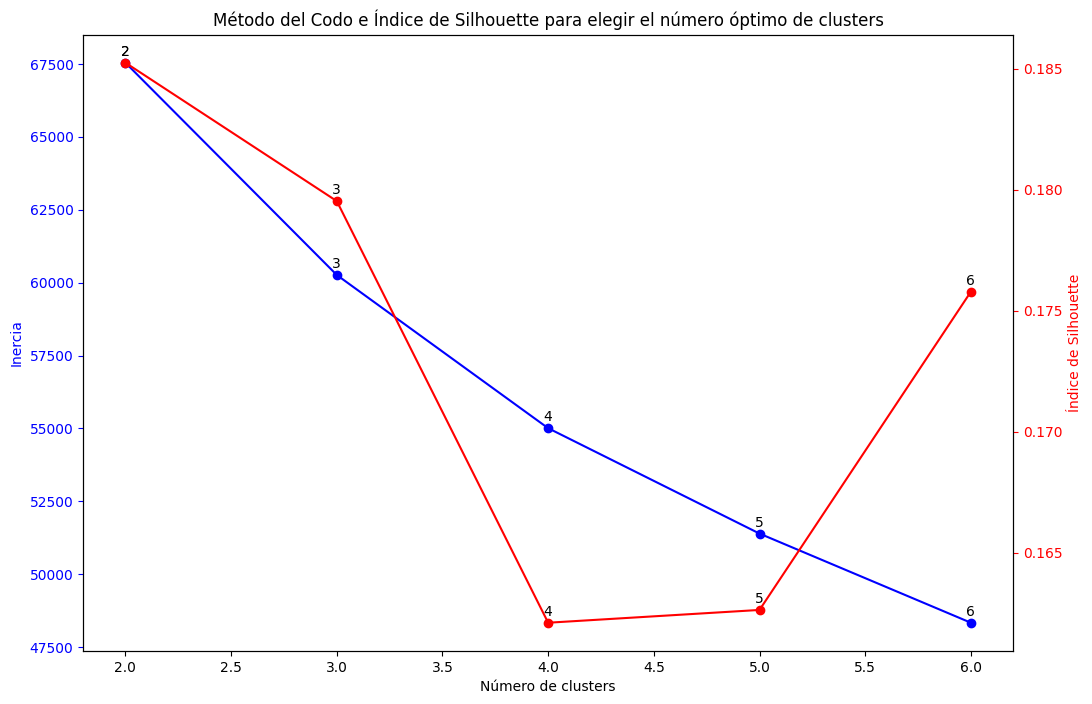

In [84]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Usamos las primeras 78 componentes en X_pca_reducido
X = X_pca_reducido

# Listas para almacenar los valores de la inercia y los índices de Silhouette
varianza_intra_cluster = []
silhouettes = []

# Iteramos sobre un rango de clusters de 2 a 6
for k in range(2, 7):  # Ajustamos el rango de 2 a 6 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    
    # Guardamos la inercia (varianza intra-cluster)
    varianza_intra_cluster.append(kmeans.inertia_)
    
    # Calculamos y guardamos el índice de Silhouette
    try:
        silhouette = silhouette_score(X, kmeans.labels_)
    except:
        silhouette = 0  # Se establece que silhouette es 0 si k <= 1
    silhouettes.append(silhouette)

# Graficamos la inercia (Método del Codo) y el índice de Silhouette
fig, ax1 = plt.subplots(figsize=(12, 8))

# Graficamos la varianza intra-cluster (inercia)
ax1.plot(range(2, 7), varianza_intra_cluster, 'bo-', label='Inercia (varianza intra-cluster)')
ax1.set_xlabel('Número de clusters')
ax1.set_ylabel('Inercia', color='b')
ax1.tick_params('y', colors='b')

# Añadimos los números de clusters en la gráfica de inercia
for i, txt in enumerate(range(2, 7)):
    ax1.annotate(txt, (i + 2, varianza_intra_cluster[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Creamos un segundo eje Y para graficar el índice de Silhouette
ax2 = ax1.twinx()
ax2.plot(range(2, 7), silhouettes, 'ro-', label='Índice de Silhouette')
ax2.set_ylabel('Índice de Silhouette', color='r')
ax2.tick_params('y', colors='r')

# Añadimos los números de clusters en la gráfica de Silhouette
for i, txt in enumerate(range(2, 7)):
    ax2.annotate(txt, (i + 2, silhouettes[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Método del Codo e Índice de Silhouette para elegir el número óptimo de clusters')
plt.show()

La inercia disminuye de forma pronunciada entre 3 y 4 clusters, lo que sugiere que el beneficio de agregar más clusters comienza a ser marginal a partir de 3 clusters. Por otro lado, revisnado el indice de silueta se debería optar por un número de clusters donde el índice de silueta sea más alto, ya que esto indica que los clusters están mejor separados y definidos. Por ejemplo, se podría optar por 3 clusters ya que tienen un mejor equilibrio entre la inercia y el índice de silueta. 

Aplicación de K-means con 3 clusters

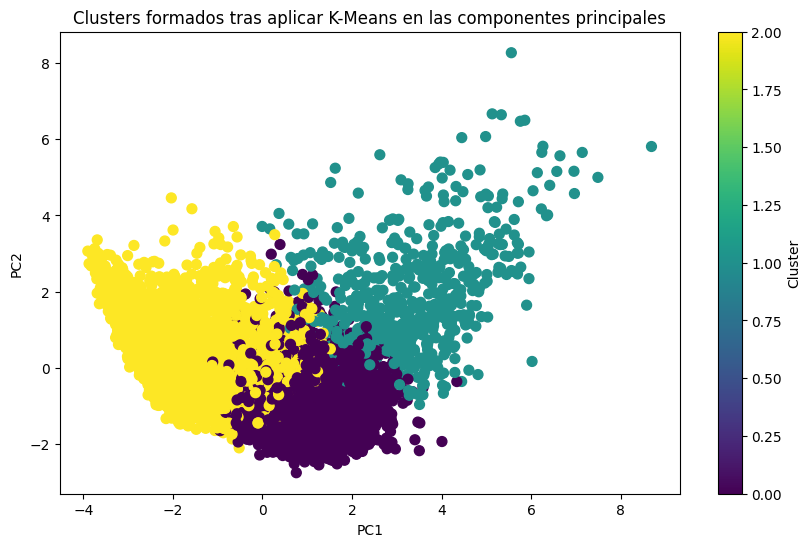

Índice de Silueta para 3 clusters: 0.1795252240544811


In [88]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determinamos el número de componentes seleccionados por PCA (en tu caso parecen ser 10)
num_components = X.shape[1]

# Aplicamos K-Means con 11 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Crear un DataFrame con las componentes principales y los clusters
loadings_df = pd.DataFrame(X, columns=[f'PC{i+1}' for i in range(num_components)])
loadings_df['cluster'] = clusters

# Visualizar los clusters en los primeros dos componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(loadings_df['PC1'], loadings_df['PC2'], c=clusters, cmap='viridis', s=50)
plt.title('Clusters formados tras aplicar K-Means en las componentes principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

# Evaluar los clusters con el índice de silueta
score = silhouette_score(X, clusters)
print(f'Índice de Silueta para 3 clusters: {score}')

In [87]:
# Añadir los clusters al DataFrame original (si no lo has hecho ya)
df['Cluster'] = kmeans.labels_  # Asegúrate de tener el modelo KMeans con 11 clusters

# Seleccionar solo las columnas numéricas para el análisis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Agrupar los datos por cluster y obtener estadísticas descriptivas para las columnas numéricas
cluster_summary = df.groupby('Cluster')[numeric_columns].mean()

# Mostrar el resumen por cluster
print(cluster_summary)


               P8R     P23S1R     P23S2   P30S1A1R   P30S2A1R   P30S3A1R  \
Cluster                                                                    
0        37.294087  11.533714  0.870851  10.823133   2.426867   9.012967   
1        35.182131  11.012027  0.962199  14.156357  10.960481  15.003436   
2        45.297173  10.391166  1.152297   6.073852   3.421908   4.567491   

         P30S4A1R   P30S5A1R   P30S6A1R  P30S7A1R   P30S8A1R  P30S9A1R  
Cluster                                                                 
0        0.187241   0.560166  19.442946  0.785270  -0.810685 -0.724585  
1        8.477663  12.685567  16.862543  4.567010  10.175258  4.257732  
2       -0.501413  -0.234629  -0.964311 -0.730035  -0.797173 -0.890813  


* Cluster 0 (Edad media: 37.29 años)

Este grupo tiene una edad media intermedia de 37.29 años. Aunque tiene un consumo moderado de alcohol y marihuana, lo más destacado es el consumo elevado de basuco, con una edad de inicio de 19.44 años, lo que lo convierte en uno de los principales patrones de consumo dentro de este cluster. Las demás sustancias tienen un consumo menor o negativo, lo que indica que este grupo tiene consumo selectivo de algunas drogas. Se diferencia por su mayor involucramiento en el consumo de basuco, pero no en otras sustancias peligrosas.

* Cluster 1 (Edad media: 35.18 años)

El grupo más joven, con una edad media de 35.18 años, presenta el mayor consumo de sustancias fuertes como la cocaína y otras drogas peligrosas. Tambien presenta un patrón alto y diversificado de consumo de sustancias. El consumo más fuerte está asociado a la marihuana (15.00 años) y basuco (16.86 años), junto con un nivel considerable de consumo de alcohol (10.96 años). Este grupo destaca por estar altamente involucrado en el consumo de varias drogas, sin valores negativos en ninguna sustancia, lo que lo posiciona como un grupo más vulnerable en términos de abuso de sustancias. Es el grupo más joven y con los consumos más altos de varias drogas.

* Cluster 2 (Edad media: 45.29 años)

Este es el grupo de mayor edad, con una media de 45.29 años. Lo más notable es que tiene valores negativos o muy bajos en la mayoría de las sustancias, lo que indica que hay una ausencia o muy bajo consumo de drogas como basuco (-0.96) y otras sustancias. El alcohol y marihuana presentan consumos moderados, pero mucho más bajos que en los otros clusters. Este grupo parece haber tenido algún contacto con las sustancias, pero actualmente se encuentra con un consumo muy reducido o nulo, reflejando un alejamiento del uso de drogas en comparación con los grupos más jóvenes.

* Estrategias específicas que pueden ser atendidas con políticas dirigidas a sus características particulares

Cluster 0: Enfocarse en reducción de daños, apoyo psicosocial y programas de empleo.

Cluster 1: Priorizar la prevención temprana, rehabilitación integral y programas de educación/capacitación laboral.

Cluster 2: Implementar rehabilitación especializada para adultos mayores, programas de reintegración laboral/social, y atención médica continua.